# Market Segmentation

## Methodology:

### Step 1 - Data Preprocessing:
    a. Load the data from the "social_marketing.csv" file
    b. Handle missing values, if any
    c. Filter out adult/ spam tweets greater than 3 by a user
    
### Step 2 - Exploratory Data Analysis:
    a. Calculate basic statistics: mean, median, standard deviation, etc., for each interest category
    b. Visualize the distribution of interests using histograms, box plots, and bar charts
    c. Check for correlations between different interests to identify potential clusters
    
### Step 3 - Dimension Reduction & Clustering:
    a. Apply PCA and tSNE to capture important features of the data
### Step 4 - Applying K-Means Clustering:
    a. Use clustering algorithms (e.g., k-means) to group users with similar interests together
    b. Explore the resulting clusters to understand the types of interests that tend to co-occur within each cluster
    
### Step 5 - Market Segment Identification:
    a. Identify the most distinctive interests for each segment, which may set them apart from other segments
    b. Based on the clustering results, define what constitutes a "market segment" 
    c. Provide insights to NutrientH20 regarding the identified market segments


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data from the CSV file
df = pd.read_csv('social_marketing.csv')

df.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df.describe()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,...,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,4.398757,1.526262,1.585004,2.696777,0.812992,1.070287,1.594012,1.788632,1.397488,0.863867,...,1.095407,0.705151,0.921340,0.710860,0.767699,1.462065,0.996574,0.336336,0.006470,0.403324
std,3.529126,1.268890,2.285530,2.731510,0.935853,1.658783,2.160917,3.031113,1.775557,1.132562,...,1.914829,1.327903,1.515359,1.782347,1.188259,2.405244,1.828412,0.618147,0.083288,1.813428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
max,26.000000,8.000000,26.000000,21.000000,9.000000,17.000000,20.000000,37.000000,16.000000,10.000000,...,20.000000,14.000000,14.000000,24.000000,11.000000,19.000000,18.000000,6.000000,2.000000,26.000000


In [6]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        7882 non-null   object
 1   chatter           7882 non-null   int64 
 2   current_events    7882 non-null   int64 
 3   travel            7882 non-null   int64 
 4   photo_sharing     7882 non-null   int64 
 5   uncategorized     7882 non-null   int64 
 6   tv_film           7882 non-null   int64 
 7   sports_fandom     7882 non-null   int64 
 8   politics          7882 non-null   int64 
 9   food              7882 non-null   int64 
 10  family            7882 non-null   int64 
 11  home_and_garden   7882 non-null   int64 
 12  music             7882 non-null   int64 
 13  news              7882 non-null   int64 
 14  online_gaming     7882 non-null   int64 
 15  shopping          7882 non-null   int64 
 16  health_nutrition  7882 non-null   int64 
 17  college_uni   

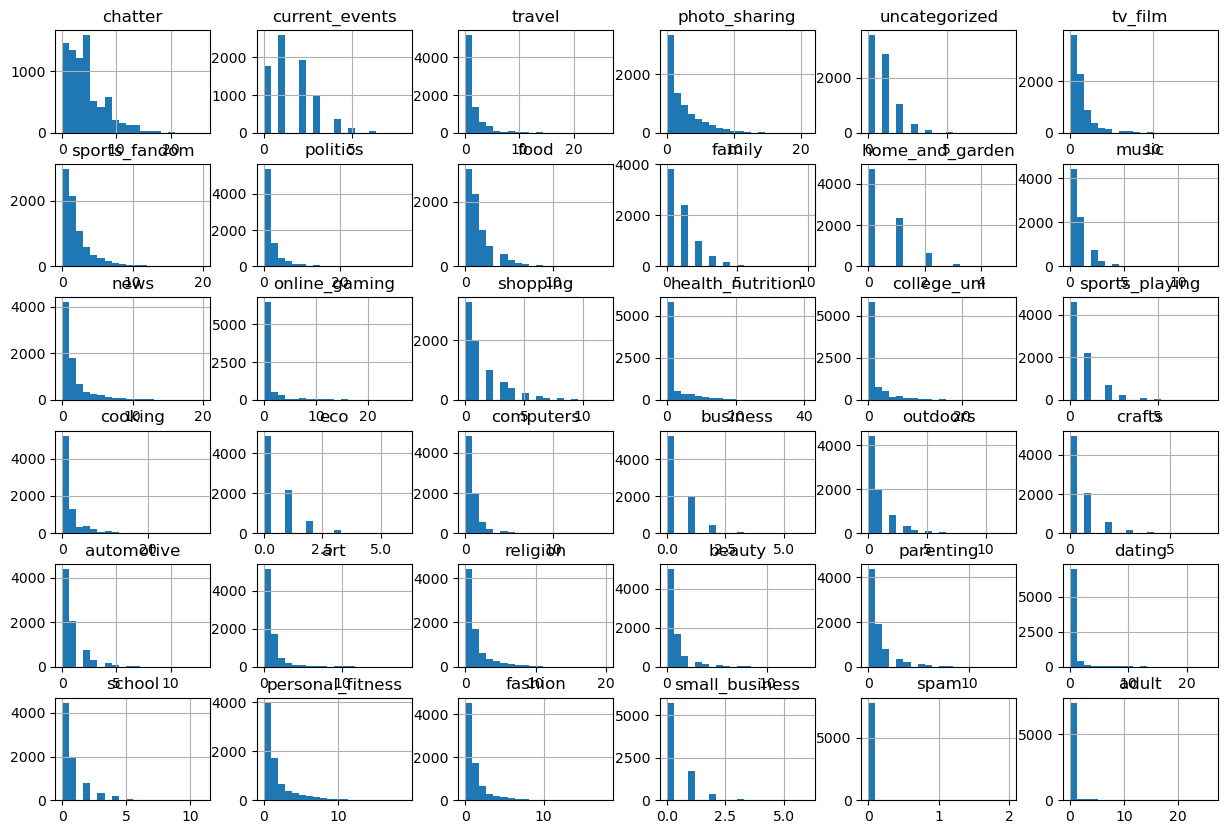

In [7]:
# Visual representation of the distribution of user activity within each interest category
interests = df.columns[1:]  # Exclude the user ID column
df[interests].hist(bins=20, figsize=(15, 10))
plt.show()

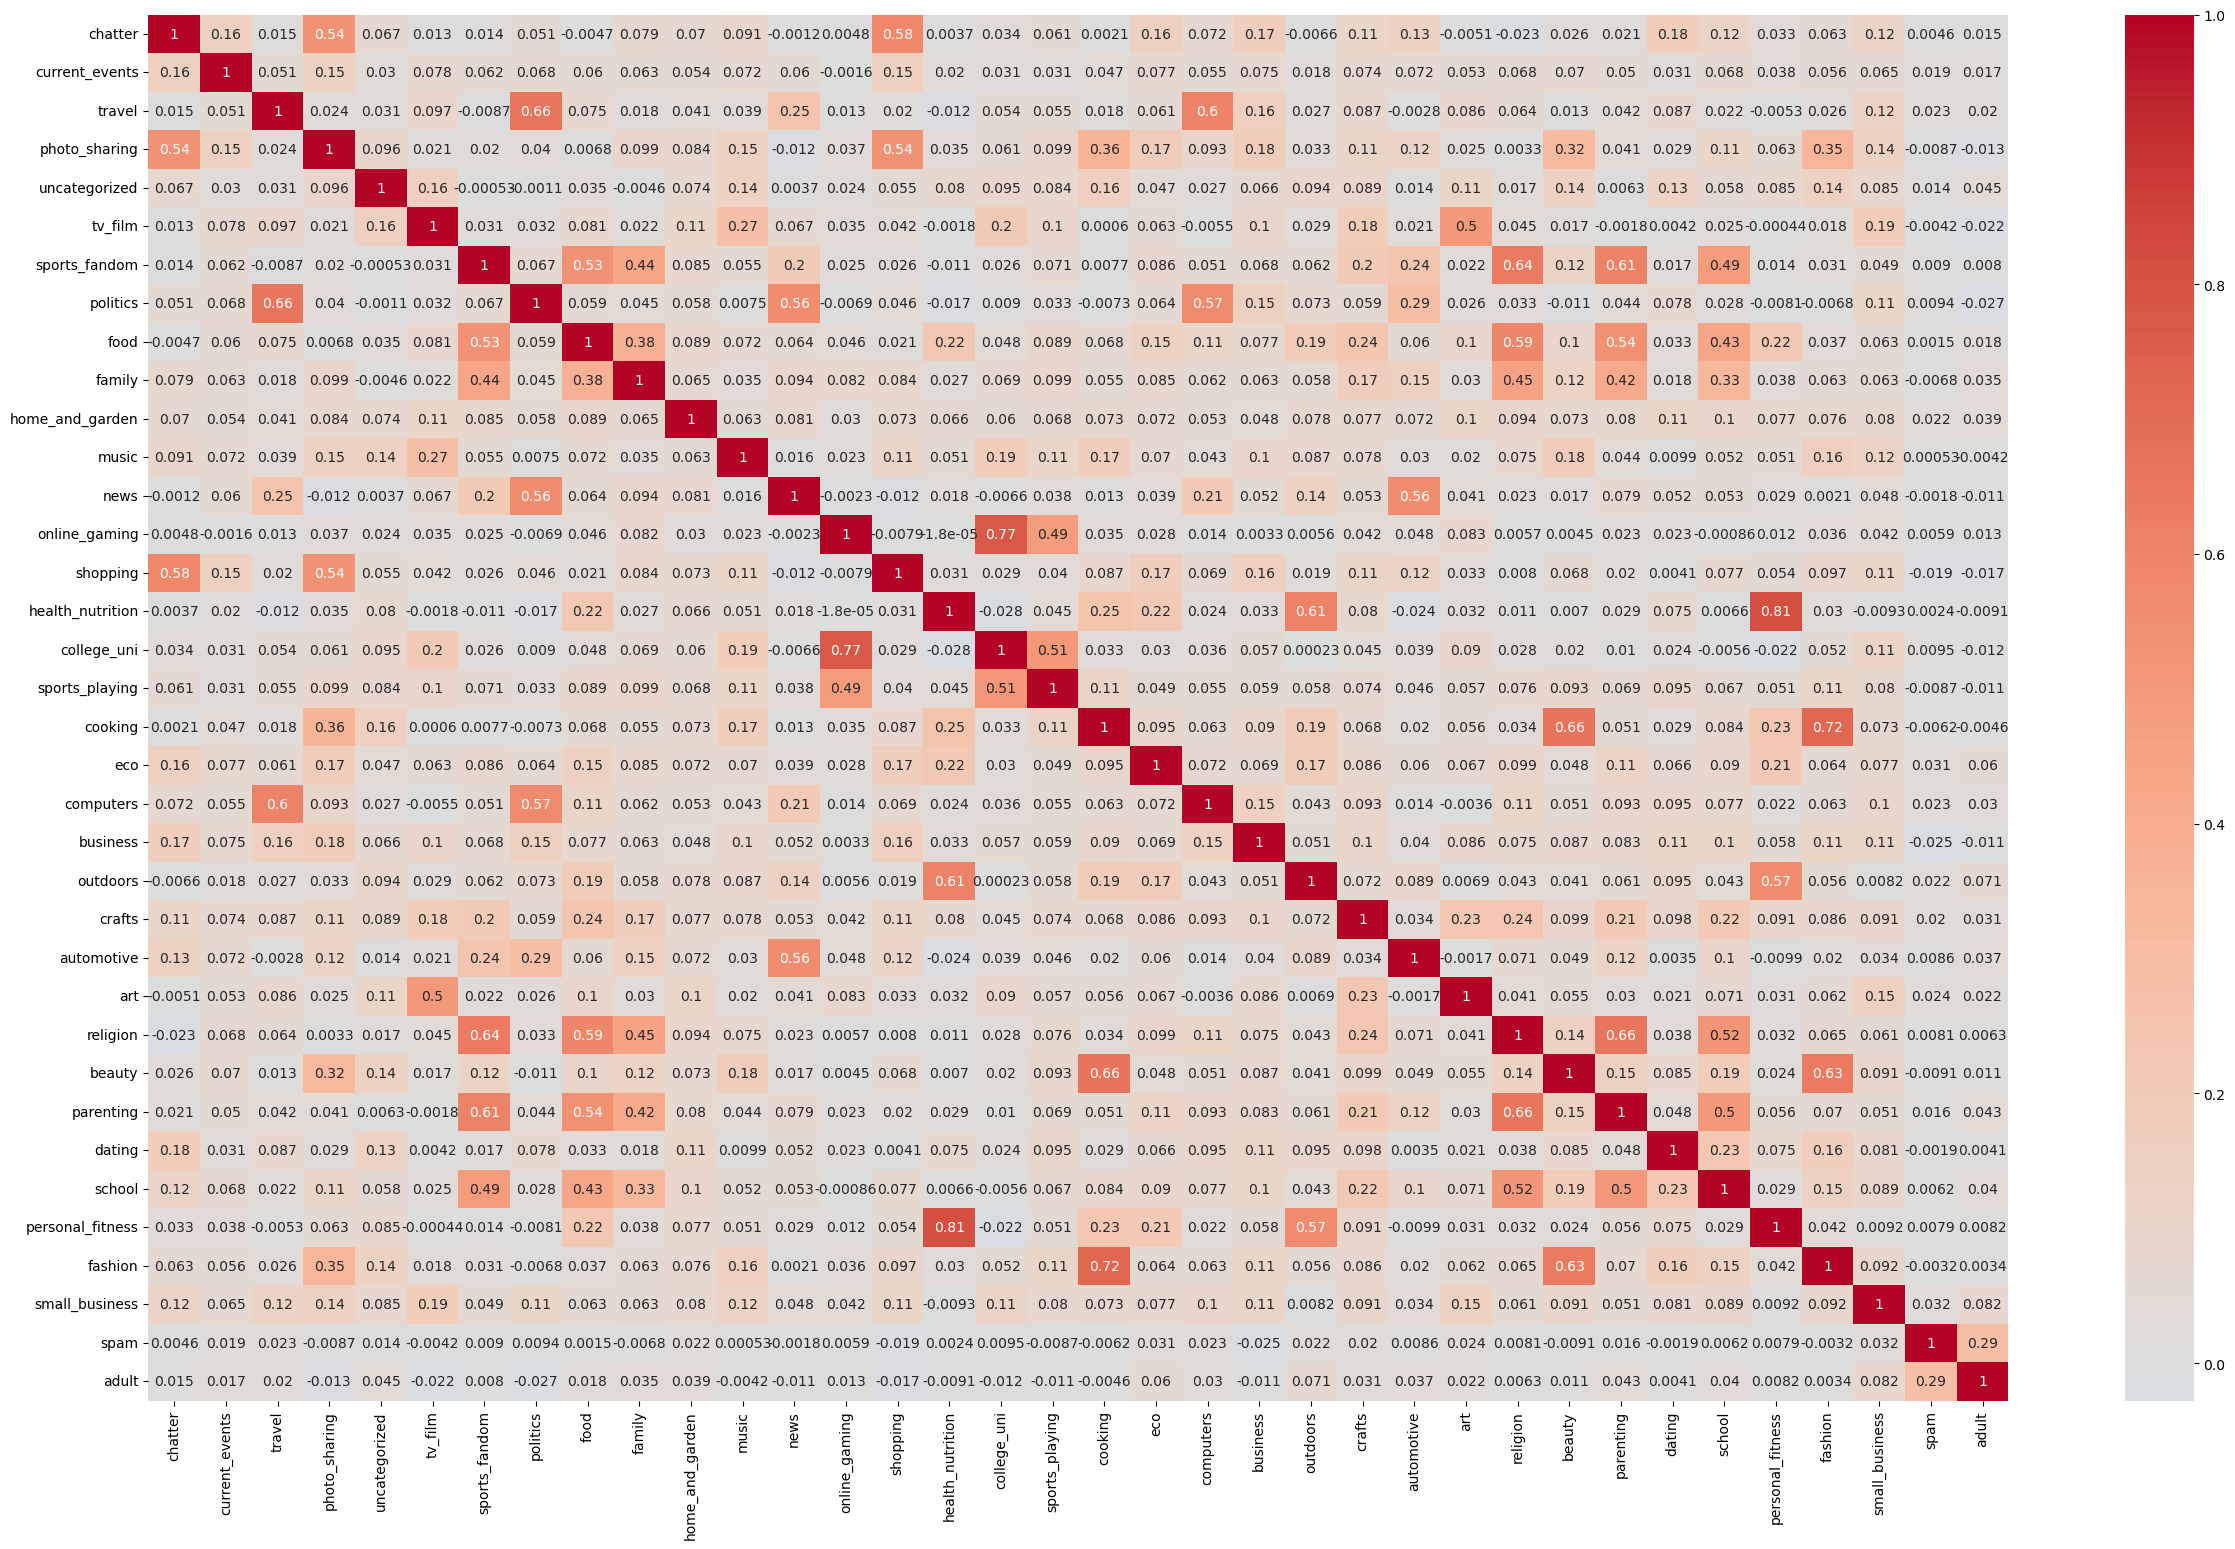

In [8]:
# Correlation heatmap
correlation_matrix = df[interests].corr()
plt.figure(figsize=(30, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

**Observations:** Some intuitive positive correlations can be observed. For instance, 'personal_fitness' with 'health_nutrition', 'politics' and 'news', 'college_uni' and 'online-gaming', 'fashion' and 'beauty', 'outdoors' and 'health_nutrition', 'religion' and 'family', etc.

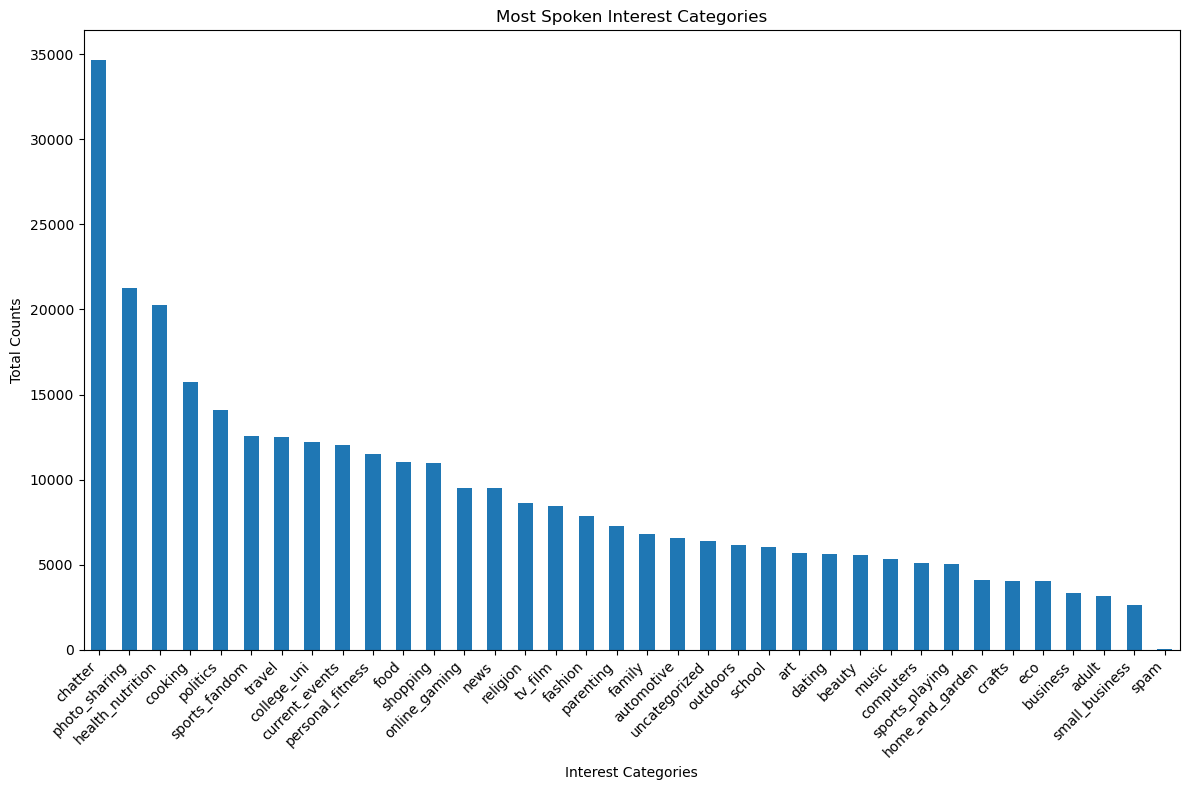

In [9]:
# Sum up counts across all users for each interest
interest_total_counts = df[interests].sum()

# Sort interests by total counts in descending order
sorted_interests = interest_total_counts.sort_values(ascending=False)

# Plot the most spoken interests
plt.figure(figsize=(12, 8))
sorted_interests.plot(kind='bar')
plt.title('Most Spoken Interest Categories')
plt.xlabel('Interest Categories')
plt.ylabel('Total Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Barring 'chatter', 'photo_sharing', 'health_nutrition', 'cooking', 'politics', 'sports_fandom' and 'travel' are mostly discussed 

In [10]:
df[df['adult'] > 2 ].shape

(426, 37)

In [11]:
# Removing Adult tweets

df = df[(df['adult'] < 2)]

df.shape

(7381, 37)

In [19]:
# Standardize the data
X = df.drop(["Unnamed: 0"], axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X.head()

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,2,0,2,2,2,1,1,0,4,1,...,1,0,1,1,0,11,0,0,0,0
1,3,3,2,1,1,1,4,1,2,2,...,0,0,0,1,4,0,0,0,0,0
2,6,3,4,3,1,5,0,2,1,1,...,0,1,0,1,0,0,1,0,0,0
3,1,5,2,2,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,5,2,0,6,1,0,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# Initialize an empty list to store inertia values
inertia = []

# Try K values from 1 to 10 (you can adjust this range)
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

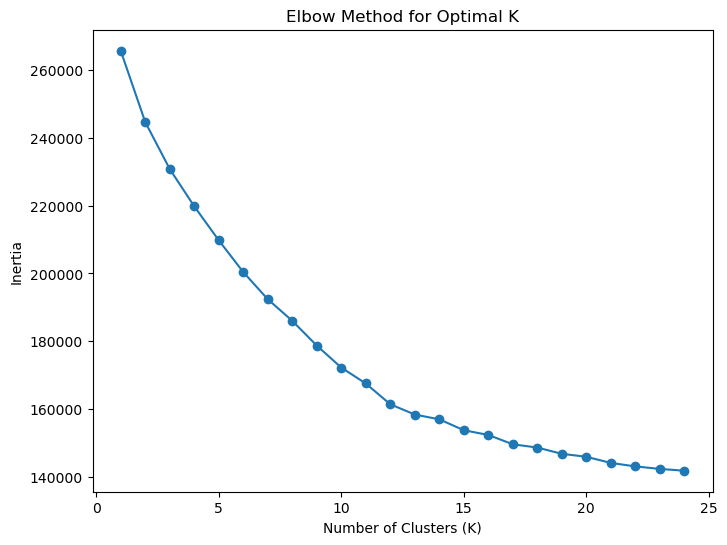

In [21]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

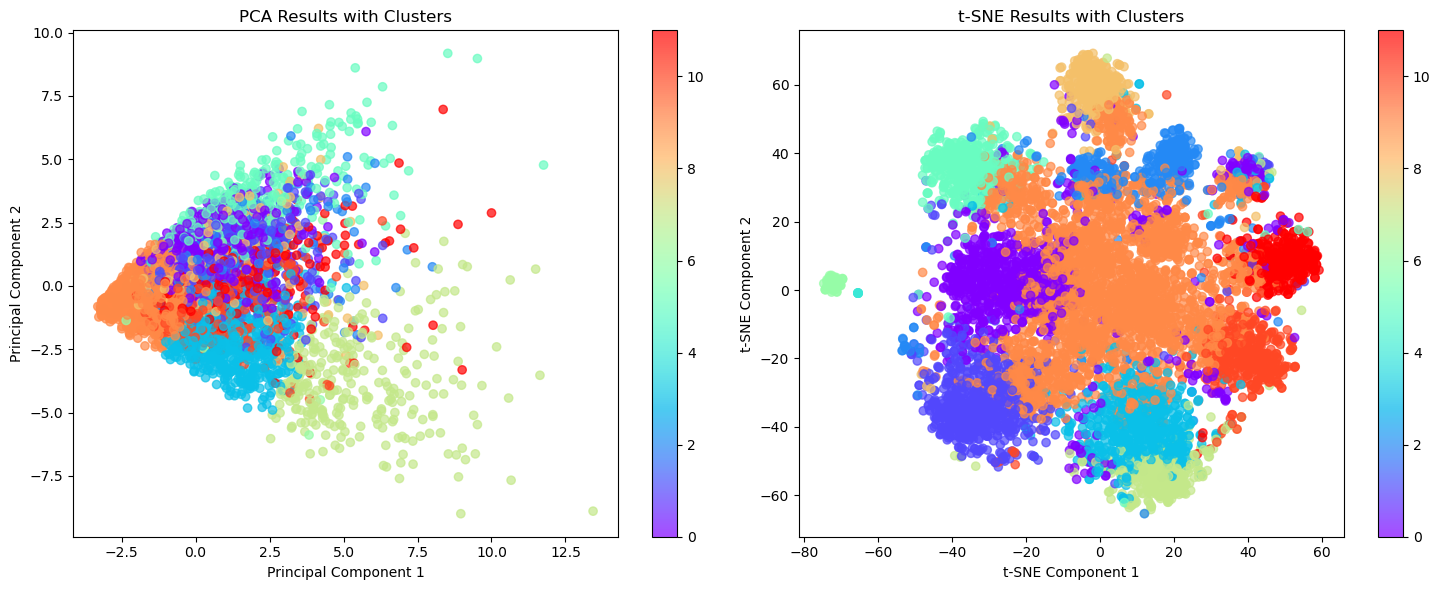

In [26]:
# Optimal K value determined from the elbow plot
optimal_k = 12

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

# Visualize PCA and t-SNE results with cluster colors
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['cluster'], cmap='rainbow', alpha=0.7)
plt.title('PCA Results with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df['cluster'], cmap='rainbow', alpha=0.7)
plt.title('t-SNE Results with Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

In [30]:
#Get cluster centroids
cluster_centroids = kmeans.cluster_centers_

#Create a DataFrame for Cluster Centroids with Feature Names
cluster_centroids_df = pd.DataFrame(cluster_centroids, columns=interests)

#Define the Number of Top Important Columns
num_top_columns = 5

# Find Top Important Columns for Each Cluster
top_columns_per_cluster = []
for cluster_id in range(optimal_k):
    cluster_centroid = cluster_centroids_df.iloc[cluster_id]
    top_columns = cluster_centroid.sort_values(ascending=False).index[:num_top_columns]
    top_columns_per_cluster.append(top_columns)
    
#Print Top Important Columns for Each Cluster
for cluster_id, top_columns in enumerate(top_columns_per_cluster):
    print(f"Cluster {cluster_id}: Top Important Columns - {', '.join(top_columns)}")

Cluster 0: Top Important Columns - chatter, shopping, photo_sharing, business, current_events
Cluster 1: Top Important Columns - health_nutrition, personal_fitness, outdoors, eco, food
Cluster 2: Top Important Columns - tv_film, art, music, small_business, crafts
Cluster 3: Top Important Columns - religion, sports_fandom, parenting, food, school
Cluster 4: Top Important Columns - spam, adult, outdoors, personal_fitness, college_uni
Cluster 5: Top Important Columns - cooking, fashion, beauty, photo_sharing, music
Cluster 6: Top Important Columns - adult, eco, automotive, chatter, school
Cluster 7: Top Important Columns - parenting, religion, sports_fandom, food, school
Cluster 8: Top Important Columns - online_gaming, college_uni, sports_playing, art, family
Cluster 9: Top Important Columns - spam, adult, dating, uncategorized, small_business
Cluster 10: Top Important Columns - news, automotive, politics, sports_fandom, outdoors
Cluster 11: Top Important Columns - travel, politics, comp

### Here's an interpretation of the clusters based on the top important columns:

**Cluster 0: General Online Activities**
Users in this cluster are engaged in online activities like chatting, shopping, sharing photos, and staying updated on current events.

**Cluster 1: Health and Fitness**
Users in this cluster are interested in health, fitness, outdoor activities, and eco-friendly topics.

**Cluster 2: Art and Entertainment**
Users in this cluster show interest in TV shows, films, art, music, and small business or crafts.

**Cluster 3: Diverse Interests**
This cluster includes users interested in religion, sports, parenting, food, and school-related topics.

**Cluster 4: Spam and Adult Content**
Users in this cluster seem to be exposed to spam and adult content, as well as personal fitness and college or university topics.

**Cluster 5: Lifestyle and Fashion**
This cluster consists of users interested in cooking, fashion, beauty, photo sharing, and music.

**Cluster 6: Mixed Interests**
Users in this cluster show a combination of interests including adult content, eco topics, automotive, chatter, and school-related topics.

**Cluster 7: Family and Religion**
Users in this cluster have interests in parenting, religion, sports fandom, food, and school.

**Cluster 8: Education and Art**
This cluster involves users interested in online gaming, college or university topics, sports playing, art, and family-related topics.

**Cluster 9:** Spam, Adult Content, and Business
Users in this cluster are exposed to spam and adult content, as well as topics related to dating, small business, and uncategorized content.

**Cluster 10: News and Politics**
This cluster includes users interested in news, politics, sports fandom, outdoors, and automotive topics.

**Cluster 11: Travel and Technology**
Users in this cluster show interests in travel, politics, computers, news, and business-related topics.

These interpretations provide a high-level overview of the interests that are prevalent within each cluster.

## Market Segment Identification and Messaging Report:

By segmenting audience based on their interests and preferences (barring spam and adult), Nutrient H2O can tailor its messaging to resonate with each of the 11 market segment's unique characteristics. Based on the clusters and their interpreted interests, we have created the following segments for Nutrient H2O, each with its own tailored messaging strategy: 

**Segment 1: Online Enthusiasts**

    A. Cluster 0: General Online Activities
    B. Messaging: Tailor messages that highlight Nutrient H2O as the perfect companion for online activities, shopping, and staying updated on current events.

**Segment 2: Health and Fitness Enthusiasts**

    A. Cluster 1: Health and Fitness
    B. Messaging: Emphasize how Nutrient H2O can support a healthy lifestyle and outdoor activities, positioning it as a choice for health-conscious individuals.

**Segment 3:Art and Entertainment Seekers**

    A. Cluster 2: Art and Entertainment
    B. Messaging: Highlight Nutrient H2O as a refreshing choice for enjoying TV shows, films, art, and music while indulging in creativity.

**Segment 4:Diverse Lifestyle Explorers**

    A. Cluster 3: Diverse Interests
    B. Messaging: Showcase the versatility of Nutrient H2O that complements users' diverse interests, from parenting and sports to food and school.

**Segment 5:Active Lifestyle with Varied Interests**

    A. Cluster 4: Spam and Adult Content (Focus on other interests)
    B. Messaging: Address personal fitness, college life, and other varied interests while steering away from spam and adult content.

**Segment 6:Lifestyle and Fashion Enthusiasts**

    A. Cluster 5: Lifestyle and Fashion
    B. Messaging: Highlight Nutrient H2O as a stylish choice for users passionate about cooking, fashion, beauty, and sharing experiences.

**Segment 7:Eclectic Interests Explorers**

    A. Cluster 6: Mixed Interests
    B. Messaging: Position Nutrient H2O as the drink for those who explore a wide range of interests, from eco-friendly choices to automotive topics.

**Segment 8:Family-Centric and Spiritual**

    A. Cluster 7: Family and Religion
    B. Messaging: Craft messages that resonate with users interested in parenting, religion, sports, and nourishing family bonds.

**Segment 9:Education and Art Enthusiasts**

    A. Cluster 8: Education and Art
    B. Messaging: Highlight Nutrient H2O as a source of inspiration for online gaming, education, art, and family-related moments.

**Segment 10:Informed and Current Events Followers**

    A. Cluster 10: News and Politics
    B. Messaging: Position Nutrient H2O as a choice for staying informed about news, politics, sports, and outdoor activities.

**Segment 11:Travel and Tech Enthusiasts**

    A. Cluster 11: Travel and Technology
    B. Messaging: Craft messages that resonate with users who love to travel, are interested in technology, politics, and staying connected.